In [1]:
import sys
sys.path.append('f:/seismic/code/core')
sys.path.append('/seismic/code/core')
sys.path.append('/kaggle/input/my-seis-library/')
import kaggle_support as kgs
import importlib
import numpy as np
import matplotlib.pyplot as plt
import glob
import copy
import os
import seis_forward
import seis_forward2
import seis_test
#plt.scatter([0,1],[1,2])
#fls.download_kaggle_dataset('jeroencottaar/byu-many-models-2/', fls.result_dir + '/many_full_res/')

capturing graph
capturing graph
Mismatch to hosts: 3.5444538831673834e-05
adjoint 8.673617379884035e-18 4.9042632427835574e-05
diff 1.5727204179012753e-13 1.6588860071825717e-07
Mismatch to hosts: 1.5741465383079042e-05
adjoint 8.592302216947623e-18 0.0001352831488805387
diff 1.17634803081803e-13 1.4481413610833205e-07
8.23042934313816e-16 1.0896616942090986e-11
All tests passed!
CPU times: total: 18.3 s
Wall time: 19 s


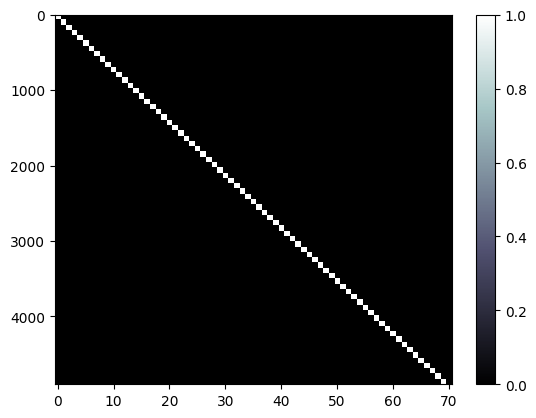

In [2]:
%%time
importlib.reload(kgs)
importlib.reload(seis_test)
importlib.reload(seis_forward2)
seis_test.run_all_tests(test_reference_mode=True)


In [6]:
import cupy as cp
import time
importlib.reload(seis_forward2)

d = kgs.load_all_train_data()[0]
d.load_to_memory()    
vec = d.velocity.to_vector()
d2 = kgs.load_all_train_data()[1]
d2.load_to_memory()    
vec2 = d2.velocity.to_vector()

kgs.profiling=False
seis_forward2.profiling=True
result, result_diff, result_adjoint = seis_forward2.vel_to_seis(vec, vec_adjoint = cp.zeros((5*999*70,1)))#, vec_adjoint = cp.zeros((5*999*70,1), dtype=kgs.base_type_gpu))
result2, result_diff, result_adjoint = seis_forward2.vel_to_seis(vec2, vec_adjoint = cp.zeros((5*999*70,1)))
print(kgs.rms(result - d.seismogram.to_vector()))
print(kgs.rms(result2 - d2.seismogram.to_vector()))
seis_forward2.reset_profile()
t=time.time()
NN=20
for ii in range(NN):
    result, result_diff, result_adjoint = seis_forward2.vel_to_seis(vec, vec_adjoint = cp.zeros((5*999*70,1)))#, vec_adjoint = cp.zeros((5*999*70,1), dtype=kgs.base_type_gpu))
    result2, result_diff, result_adjoint = seis_forward2.vel_to_seis(vec2, vec_adjoint = cp.zeros((5*999*70,1)))
print((time.time()-t)/(2*NN))
seis_forward2.show_profile(2*NN)

capturing graph
capturing graph
3.274694026346925e-05
3.176099982855424e-05
0.10358171463012696
init: 0.0000
prep for source loop: 0.0010
prep for time loop: 0.0014
time loop: 0.0344
extract seis: 0.0009
prep for time loop adjoint: 0.0008
time loop adjoint: 0.0613
end adjoint: 0.0020
finish: 0.0016


In [4]:
import os
print(os.getpid())

3488


In [5]:
ncu --section source --metrics sm_efficiency,achieved_occupancy,global_load_throughput,global_store_throughput --target-processes all  --target-pid 17980

SyntaxError: invalid syntax (4089807190.py, line 1)